앞서 진행한 EDA에서 확인한 결과를 토대로, feature engineering을 진행하여 모델 성능을 높여보자

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

## 데이터 불러오기

- Pregnancies: 임신 횟수
- Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure: 이완기 혈압 (mm Hg)
- Skin Thickness: 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin: 2시간 혈청 인슐린 (mu U /ml)
- BMI: 체질량 지수(kg / (m)^2)
- DiabetesPedigreeFunction: 당뇨병 혈통 기능
- Age: 나이
- Outcome: (예측해야할 종속 변수) 768개 중에 268개의 결과 클래스 변수(0또는 1)는 1이고 나머지는 0 입니다.

In [134]:
df=pd.read_csv('../data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##  Overfitting이란?

- 수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어서 tree가 깊어지고, 하나의 노드의 sample 수가 적어질 수 있다.
- Overfitting 되면 train 데이터는 잘 맞추지만, 새로운 데이터는 많이 틀릴 수 있다.

## Model1. Pregnancies 변수 전처리

잘게 쪼개진 임신횟수 수치형 변수를 범주형으로 변경해줍니다.

변수 추가 [Preg_high]  
- 0~6: False
- 7~ : True

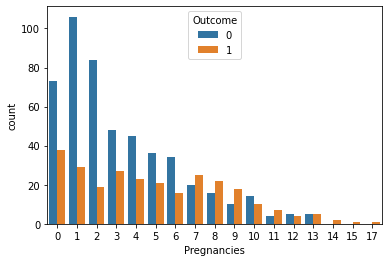

In [135]:
# 임신 횟수 7회를 기준으로 outcome 비율 달라짐
sns.countplot(data=df, x ='Pregnancies',hue='Outcome')

In [136]:
df['preg_high'] = df['Pregnancies'] > 6
df[['preg_high','Pregnancies']].head(10)

,preg_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0
5,False,5
6,False,3
7,True,10
8,False,2
9,True,8


### train, test split

In [137]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high']]
y = df['Outcome']

In [138]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

###  fit, predict

In [139]:
# 의사결정 나무 모델 만들기
model1 = DecisionTreeClassifier(random_state=1111)
model1.fit(X_train, y_train)
pred = model1.predict(X_test)

### feature 중요도

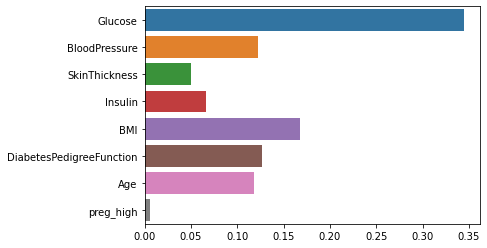

In [140]:
# 기존모델보다 pregnancies의 중요도가 내려감
sns.barplot(x=model1.feature_importances_,y=X.columns)

In [141]:
model1.feature_importances_

array([0.3440773 , 0.12212986, 0.04971957, 0.06571975, 0.16805863,
       0.12669097, 0.11806371, 0.0055402 ])

BaseModel에서 임신횟수의 피쳐 중요도는 `0.06588507` 였는데, 수치형을 범주형으로 변환해준 뒤 시행한 모델에서는 `0.02149862`으로 낮아졌다.

### aacuracy

In [142]:
accuracy_score(y_test,pred)

0.7597402597402597

BaseModel 보다 정확도가 `3%`  올랐다.

## Model2. Age 변수 전처리

[Age를 3가지 범주로 나누어주기]

- 25세 미만
- 25세 ~ 60세 미만
- 60세 이상

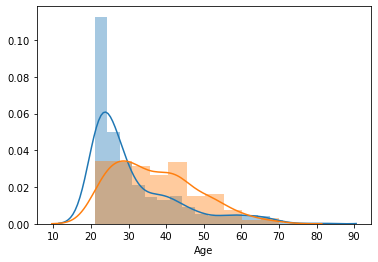

In [144]:
# 30세를 전후로 당뇨 발병율에 차이가 있음
df_0=df[df['Outcome'] == 0]
df_1=df[df['Outcome'] == 1]
sns.distplot(df_0['Age'])
sns.distplot(df_1['Age'])

In [145]:
df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >=25) & (df['Age']< 60)
df['Age_high'] = df['Age'] >=60

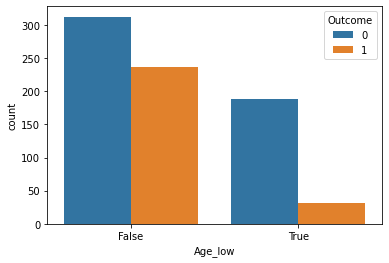

In [146]:
sns.countplot(data=df, x='Age_low', hue ='Outcome')

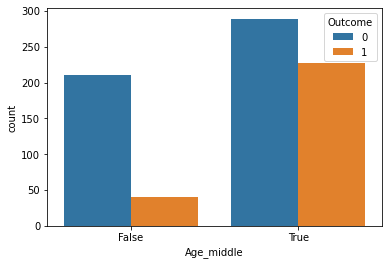

In [147]:
sns.countplot(data=df, x='Age_middle', hue ='Outcome')

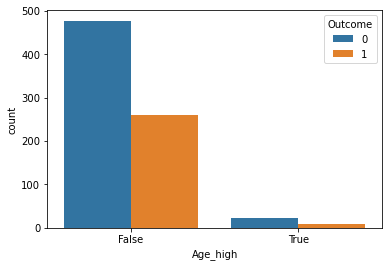

In [148]:
sns.countplot(data=df, x='Age_high', hue ='Outcome')

### train, test split

In [149]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age_low','Age_middle','Age_high', 'preg_high']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [150]:
# 의사결정 나무 모델 만들기
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred = model.predict(X_test)

### feature 중요도

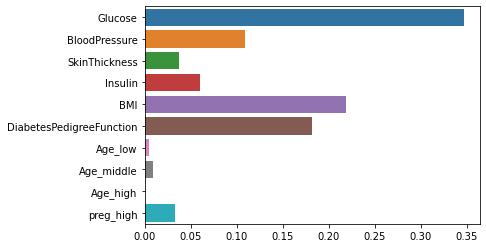

In [151]:
# 기존모델보다 pregnancies의 중요도가 내려감
sns.barplot(x=model.feature_importances_,y=X.columns)

In [152]:
model.feature_importances_

array([0.34652917, 0.10927242, 0.0371798 , 0.05963769, 0.21854382,
       0.18153464, 0.00483588, 0.00950444, 0.        , 0.03296214])

BaseModel에서 Age 중요도 `0.11356207`

### accuracy

In [153]:
accuracy_score(y_test,pred)

0.7012987012987013

BaseModel 보다도 약 `3%` 정확도가 감소했고, Model1 보다 `5%` 감소했다.

-> 피처엔지니어링을 해주었을 때, 성능이 오르기만하는것은 아니고 오히려 떨어지기도 한다.

## Model3. 결측치 처리하기

- insulin 이 0 인것은 결측치로 볼 수 있다. 
- 해당 컬럼의 평균 값으로 대체하자

In [154]:
df['Insulin_n']=df['Insulin'].replace(0,np.nan)

In [155]:
df['Insulin_n'].isnull().sum()

374

결측치 있는 값들을 해당 컬럼의 평균값으로 변경해줍니다.

* 중요: 전체 평균으로 하면 안되고, 발병 여부에 따른 평균값으로 넣어줘야 정확도 올라감

In [156]:
df.groupby('Outcome')['Insulin_n'].mean()

Outcome
0    130.287879
1    206.846154
Name: Insulin_n, dtype: float64

- Insulin 컬럼은 결측치가 0으로 되어있고, Insulin_n은 결측치가 null 값으로 되어있다. 0은 평균에 영향을 미치고 null값은 계산되지 않으므로 평균을 구할 때 `insulin_n 컬럼을 사용`해주었다.

In [157]:
df.loc[(df['Outcome'] == 0)& (df['Insulin_n'].isnull()),'Insulin_n'] = 130.287879

df.loc[(df['Outcome'] == 1)& (df['Insulin_n'].isnull()),'Insulin_n'] = 206.846154

### train, test split

In [158]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_n',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [159]:
# 의사결정 나무 모델 만들기
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred = model.predict(X_test)

### fiture 중요도

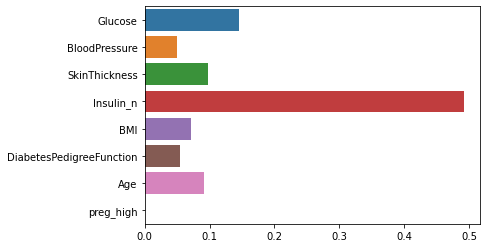

In [160]:
sns.barplot(x=model.feature_importances_,y=X.columns)

In [161]:
model.feature_importances_

array([0.14457726, 0.04908987, 0.09803584, 0.49140545, 0.07091384,
       0.05428613, 0.09169162, 0.        ])

[중요도 변화] 
- Glucose: 20% 감소
- Insulin: 42% 증가 

BaseModel 에서는 Glucose가 가장 중요한 요소였는데, Insulin이 가장 중요한 요소로 변경됨

### accuracy

In [162]:
accuracy_score(y_test,pred)

0.8766233766233766

정확도가 BaseModel 보다 `17%` , Model1보다 `15%`올랐다. 

## Model4. 로그 변환

데이터가 한쪽으로 치우쳐있을 때 학습에 어려움이 있을 수 있다.

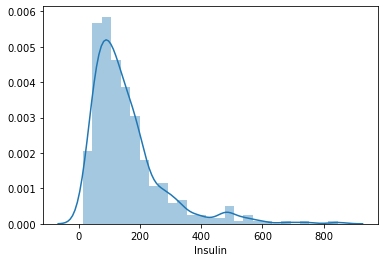

In [163]:
sns.distplot(df.loc[df['Insulin']>0,'Insulin'])

로그를 씌워주면 정규분포 형태로 변환됨
로그 씌워줄때 +1해주는 이유는, -값이 0으로 수렴하기때문

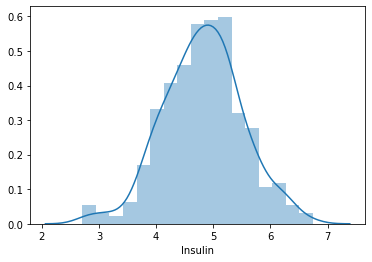

In [164]:
sns.distplot(np.log(df.loc[df['Insulin']>0,'Insulin']+1))

결측치 처리한 Insulin값으로 distplot 다시 그려보기

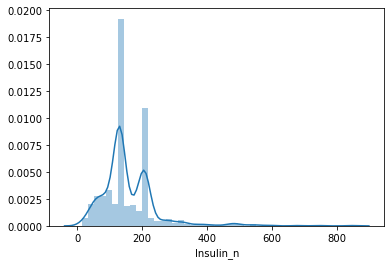

In [165]:
sns.distplot(df['Insulin_n'])

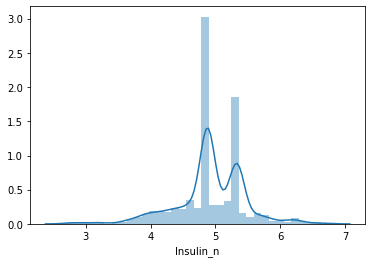

In [166]:
sns.distplot(np.log(df['Insulin_n']+1))

Insulin_log 변수 추가

In [167]:
df['Insulin_log']=np.log(df['Insulin_n']+1)

### train, test split

In [168]:
# 독립변수: X, 종속변수: y
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_log',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [169]:
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred=model.predict(X_test)

### fiture 중요도

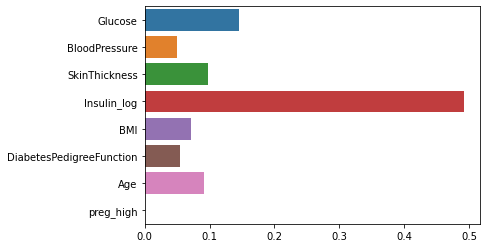

In [170]:
sns.barplot(x=model.feature_importances_,y=X.columns)

In [171]:
model.feature_importances_

array([0.14457726, 0.04908987, 0.09803584, 0.49140545, 0.07091384,
       0.05428613, 0.09169162, 0.        ])

인슐린 중요도 2% 감소

### accuracy

In [172]:
accuracy_score(y_test,pred)

0.8766233766233766

- 인슐린 로그 씌우기 전: `0.8701298701298701`  
-> 인슐린에 로그를 씌우지 않았을 때 보다 약 `0.006` 증가

## Model5. 상관계수 사용해서 파생변수 만들기

- 인슐린과 글루코스 상관관계 보기

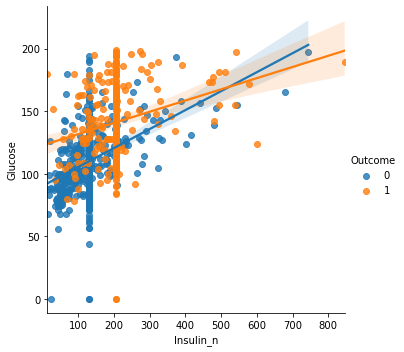

In [173]:
sns.lmplot(data=df, x='Insulin_n', y='Glucose', hue='Outcome')

In [174]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_n'] <= 130.287879 ) #위에 insulin_n mean값 가져옴

In [175]:
# low_glu_insulin일 때 발병하는 사람 5명으로 매우 적음 
pd.crosstab(df['Outcome'],df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,323,177
1,263,5


In [176]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'preg_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_n', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

### train, test split

In [177]:
# 독립변수: X, 종속변수: y
# low_glu_insulin 추가

X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_log',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high','low_glu_insulin']]
y = df['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [178]:
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred=model.predict(X_test)

### feature 중요도

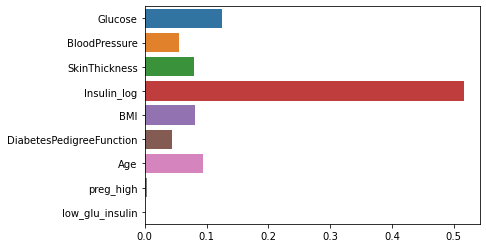

In [179]:
sns.barplot(x=model.feature_importances_,y=X.columns)

### accuracy

In [180]:
accuracy_score(y_test,pred)

0.8766233766233766

model4: `0.8766233766233766`

model4보다 약 1% 정확도 높아짐

## Model6. 이상치 다루기

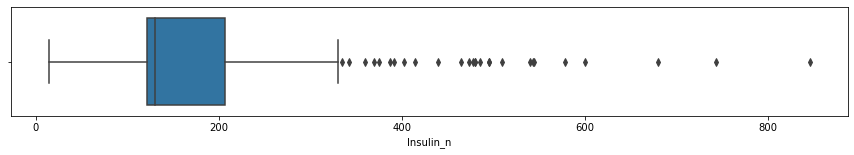

In [181]:
plt.figure(figsize=(15,2))
# 600 이상에 결측치
sns.boxplot(df['Insulin_n'])

In [182]:
df['Insulin_n'].describe()

count    768.000000
mean     157.003527
std       88.860914
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      846.000000
Name: Insulin_n, dtype: float64

In [183]:
IQR3=df['Insulin_n'].quantile(0.75)
IQR1=df['Insulin_n'].quantile(0.25)

IQR = (IQR3 - IQR1)

In [184]:
# IQR3에서 IQR의 1.5배 초과하는 값은 이상치로 봄
out = IQR3 + (IQR * 1.5)
out

334.86538500000006

In [185]:
# 이상치 27개
df[df['Insulin_n'] > out].shape

(27, 16)

In [186]:
# 이상치 제거한 테이블 
df_new = df[df['Insulin_n'] <= out]

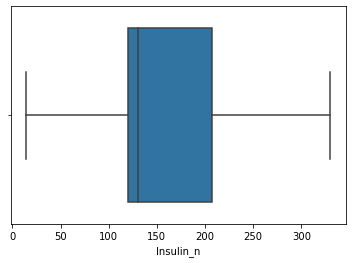

In [187]:
# 이상치 사라진 것 확인
sns.boxplot(df_new['Insulin_n'])

### train, test split

In [188]:
# 독립변수: X, 종속변수: y
# df_new로 나누기
# insulin_log 말고 insulin_n 넣어줌 (처리했던 변수)

X = df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_n',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high','low_glu_insulin']]
y = df_new['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [189]:
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred=model.predict(X_test)

### fiture 중요도

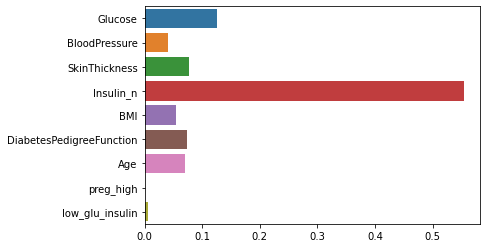

In [190]:
sns.barplot(x=model.feature_importances_,y=X.columns)

### accuracy

In [191]:
accuracy_score(y_test,pred)

0.9060402684563759

model5. `0.8896103896103896`

model5보다 약 0.02 증가

## Model7. Scaling

`숫자의 범위` 가 다르면 feature 별로 비중이 다르게 계산될 수 있으므로 스케일링 기법을 사용하기도 합니다. -> 일정한 범위로 수치 맞추어주기

In [192]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_new[['Glucose','DiabetesPedigreeFunction']])
scale=scaler.transform(df_new[['Glucose','DiabetesPedigreeFunction']])

In [193]:
df_new[['Glucose','DiabetesPedigreeFunction']] = scale
df_new[['Glucose','DiabetesPedigreeFunction']]

<ipython-input-193-88bad5382749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Glucose','DiabetesPedigreeFunction']] = scale
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Glucose,DiabetesPedigreeFunction
0,0.911763,0.495819
1,-1.100140,-0.363426
2,2.029486,0.635913
3,-0.972400,-0.936255
4,0.560478,5.666850
...,...,...
763,-0.589181,-0.923802
764,0.081454,-0.397671
765,0.049519,-0.693425
766,0.209193,-0.369652


### train, test split

In [194]:
# 독립변수: X, 종속변수: y
# df_new로 나누기
# insulin_log 말고 insulin_n 넣어줌 (처리했던 변수)

X = df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin_n',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'preg_high','low_glu_insulin']]
y = df_new['Outcome']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

### fit, predict

In [195]:
model = DecisionTreeClassifier(random_state=1111)
model.fit(X_train, y_train)
pred=model.predict(X_test)

### feature 중요도

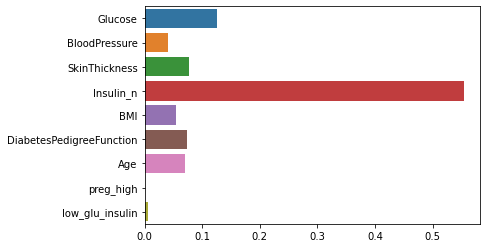

In [196]:
sns.barplot(x=model.feature_importances_,y=X.columns)

### accuracy

In [197]:
accuracy_score(y_test,pred)

0.9060402684563759

Model6. `0.9060402684563759`
동일함

## 전처리 완료한 파일 내보내기

In [132]:
df_new.to_csv('../data/diabetes_feature.csv',index=False)